In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import shapefile as shp
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import folium
%matplotlib inline
import numpy as np
import plotly.graph_objects as go
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

1. Data preprocessing

In [2]:
# Loading dataset
df_van = pd.read_csv('van.csv') 
df_van.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2021      4   26     4      44   
4  Break and Enter Commercial  2014      8    8     5      13   

     HUNDRED_BLOCK NEIGHBOURHOOD            X             Y  
0              NaN      Oakridge  491285.0000  5.453433e+06  
1    10XX SITKA SQ      Fairview  490612.9648  5.457110e+06  
2  10XX ALBERNI ST      West End  491007.7798  5.459174e+06  
3  10XX ALBERNI ST      West End  491007.7798  5.459174e+06  
4  10XX ALBERNI ST      West End  491015.9434  5.459166e+06

In [3]:
# Renaming columns
df_van.rename(columns={'TYPE': 'type', 'YEAR': 'year','MONTH':'month','DAY':'day','HOUR':'hour','MINUTE':'minute',
                       'HUNDRED_BLOCK':'address','NEIGHBOURHOOD':'neighbourhood','X':'longitude','Y':'latitude'}, inplace=True)
df_van.head()

type  year  month  day  hour  minute  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2021      4   26     4      44   
4  Break and Enter Commercial  2014      8    8     5      13   

           address neighbourhood    longitude      latitude  
0              NaN      Oakridge  491285.0000  5.453433e+06  
1    10XX SITKA SQ      Fairview  490612.9648  5.457110e+06  
2  10XX ALBERNI ST      West End  491007.7798  5.459174e+06  
3  10XX ALBERNI ST      West End  491007.7798  5.459174e+06  
4  10XX ALBERNI ST      West End  491015.9434  5.459166e+06

In [4]:
# Checking for missing values
df_van.isnull().sum()

type               0
year               0
month              0
day                0
hour               0
minute             0
address           12
neighbourhood    135
longitude         74
latitude          74
dtype: int64

In [5]:
# Replacing missing values from selected numeric columns with the mean
df_van['latitude'].fillna(df_van['latitude'].mean(), inplace = True)
df_van['longitude'].fillna(df_van['longitude'].mean(), inplace = True)
df_van.isnull().sum()

type               0
year               0
month              0
day                0
hour               0
minute             0
address           12
neighbourhood    135
longitude          0
latitude           0
dtype: int64

In [6]:
# Combined year,month,day columns and transformed them
df_van['date'] = pd.to_datetime({'year':df_van['year'], 'month':df_van['month'], 'day':df_van['day']})
df_van.head()

type  year  month  day  hour  minute  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2021      4   26     4      44   
4  Break and Enter Commercial  2014      8    8     5      13   

           address neighbourhood    longitude      latitude       date  
0              NaN      Oakridge  491285.0000  5.453433e+06 2012-12-14  
1    10XX SITKA SQ      Fairview  490612.9648  5.457110e+06 2019-03-07  
2  10XX ALBERNI ST      West End  491007.7798  5.459174e+06 2019-08-27  
3  10XX ALBERNI ST      West End  491007.7798  5.459174e+06 2021-04-26  
4  10XX ALBERNI ST      West End  491015.9434  5.459166e+06 2014-08-08

In [7]:
# Combined hour,minute columns and transformed them
df_van['time'] = (pd.to_datetime(df_van['hour'].astype(str) + ':' + df_van['minute'].astype(str), format='%H:%M')
          .dt.time)
df_van.head()

type  year  month  day  hour  minute  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2021      4   26     4      44   
4  Break and Enter Commercial  2014      8    8     5      13   

           address neighbourhood    longitude      latitude       date  \
0              NaN      Oakridge  491285.0000  5.453433e+06 2012-12-14   
1    10XX SITKA SQ      Fairview  490612.9648  5.457110e+06 2019-03-07   
2  10XX ALBERNI ST      West End  491007.7798  5.459174e+06 2019-08-27   
3  10XX ALBERNI ST      West End  491007.7798  5.459174e+06 2021-04-26   
4  10XX ALBERNI ST      West End  491015.9434  5.459166e+06 2014-08-08   

       time  
0  08:52:00  
1  02:06:00  
2  04:12:00  
3  04:44:00  
4  05:13:00

In [8]:
# Extracting day of the week from date
df_van['dayofweek'] = df_van['date'].dt.day_name()
df_van.head()

type  year  month  day  hour  minute  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2021      4   26     4      44   
4  Break and Enter Commercial  2014      8    8     5      13   

           address neighbourhood    longitude      latitude       date  \
0              NaN      Oakridge  491285.0000  5.453433e+06 2012-12-14   
1    10XX SITKA SQ      Fairview  490612.9648  5.457110e+06 2019-03-07   
2  10XX ALBERNI ST      West End  491007.7798  5.459174e+06 2019-08-27   
3  10XX ALBERNI ST      West End  491007.7798  5.459174e+06 2021-04-26   
4  10XX ALBERNI ST      West End  491015.9434  5.459166e+06 2014-08-08   

       time dayofweek  
0  08:52:00    Friday  
1  02:06:00  Thursday  
2  04:12:00   Tuesday  
3  04:44:00    Monday  
4  05:13:00    Friday

In [9]:
# Deleting missing values
df_van.dropna(axis=0,inplace=True)
df_van

type  year  month  day  \
1                              Break and Enter Commercial  2019      3    7   
2                              Break and Enter Commercial  2019      8   27   
3                              Break and Enter Commercial  2021      4   26   
4                              Break and Enter Commercial  2014      8    8   
5                              Break and Enter Commercial  2020      7   28   
...                                                   ...   ...    ...  ...   
810979  Vehicle Collision or Pedestrian Struck (with I...  2003      9    1   
810980  Vehicle Collision or Pedestrian Struck (with I...  2005      7   20   
810981  Vehicle Collision or Pedestrian Struck (with I...  2016      6   20   
810982  Vehicle Collision or Pedestrian Struck (with I...  2013     12    3   
810983  Vehicle Collision or Pedestrian Struck (with I...  2013     12   27   

        hour  minute                       address neighbourhood    longitude  \
1          2       6                 10XX SITKA SQ      Fairview  490612.9648   
2          4      12               10XX ALBERNI ST      West End  491007.7798   
3          4      44               10XX ALBERNI ST      West End  491007.7798   
4          5      13               10XX ALBERNI ST      West End  491015.9434   
5         19      12               10XX ALBERNI ST      West End  491015.9434   
...      ...     ...                           ...           ...          ...   
810979    20      45  YUKON ST / W KING EDWARD AVE    Riley Park  491786.0000   
810980    18      57  YUKON ST / W KING EDWARD AVE    Riley Park  491786.0000   
810981    18      11  YUKON ST / W KING EDWARD AVE    Riley Park  491786.0000   
810982     9      49  YUKON ST / W KING EDWARD AVE    Riley Park  491835.0000   
810983    14      40  YUKON ST / W KING EDWARD AVE    Riley Park  491835.0000   

            latitude       date      time  dayofweek  
1       5.457110e+06 2019-03-07  02:06:00   Thursday  
2       5.459174e+06 2019-08-27  04:12:00    Tuesday  
3       5.459174e+06 2021-04-26  04:44:00     Monday  
4       5.459166e+06 2014-08-08  05:13:00     Friday  
5       5.459166e+06 2020-07-28  19:12:00    Tuesday  
...              ...        ...       ...        ...  
810979  5.455143e+06 2003-09-01  20:45:00     Monday  
810980  5.455143e+06 2005-07-20  18:57:00  Wednesday  
810981  5.455143e+06 2016-06-20  18:11:00     Monday  
810982  5.455126e+06 2013-12-03  09:49:00    Tuesday  
810983  5.455126e+06 2013-12-27  14:40:00     Friday  

[810837 rows x 13 columns]

<AxesSubplot:title={'center':'Hour vs Minute'}, xlabel='hour', ylabel='minute'>

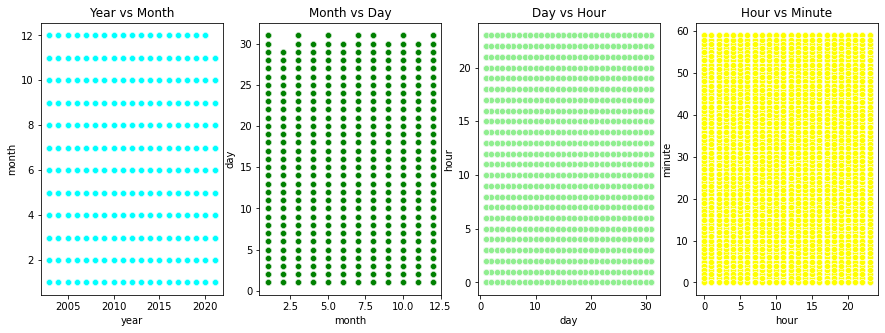

In [10]:
# detecting outliers
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].set_title('Year vs Month')
sns.scatterplot(ax=axes[0], x = df_van.year, y =  df_van.month, color = 'cyan')
axes[1].set_title('Month vs Day')
sns.scatterplot(ax=axes[1], x = df_van.month, y =  df_van.day, color = 'g')
axes[2].set_title('Day vs Hour')
sns.scatterplot(ax=axes[2], x =  df_van.day, y =  df_van.hour, color = 'lightgreen')
axes[3].set_title('Hour vs Minute')
sns.scatterplot(ax=axes[3], x = df_van.hour, y = df_van.minute, color = 'yellow')

In [11]:
# removing outliers for year column
Q1 = np.percentile(df_van['year'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_van['year'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df_van['year'] >= (Q3+1.5*IQR))
# uower bound
lower_bound = np.where(df_van['year'] <= (Q1-1.5*IQR))


df_van.drop(upper_bound[0], inplace = True)
df_van.drop(lower_bound[0], inplace = True)

print("New Shape: ", df_van.shape)

New Shape:  (810837, 13)


In [12]:
# removing outliers for month column
Q1 = np.percentile(df_van['month'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_van['month'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df_van['month'] >= (Q3+1.5*IQR))
# uower bound
lower_bound = np.where(df_van['month'] <= (Q1-1.5*IQR))


df_van.drop(upper_bound[0], inplace = True)
df_van.drop(lower_bound[0], inplace = True)

print("New Shape: ", df_van.shape)

New Shape:  (810837, 13)


In [13]:
# removing outliers for day column
Q1 = np.percentile(df_van['day'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_van['day'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df_van['day'] >= (Q3+1.5*IQR))
# uower bound
lower_bound = np.where(df_van['day'] <= (Q1-1.5*IQR))


df_van.drop(upper_bound[0], inplace = True)
df_van.drop(lower_bound[0], inplace = True)

print("New Shape: ", df_van.shape)

New Shape:  (810837, 13)


In [14]:
# removing outliers for hour column
Q1 = np.percentile(df_van['hour'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_van['hour'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df_van['hour'] >= (Q3+1.5*IQR))
# uower bound
lower_bound = np.where(df_van['hour'] <= (Q1-1.5*IQR))


df_van.drop(upper_bound[0], inplace = True)
df_van.drop(lower_bound[0], inplace = True)

print("New Shape: ", df_van.shape)

New Shape:  (810837, 13)


In [15]:
# removing outliers for minute column
Q1 = np.percentile(df_van['minute'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_van['minute'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df_van['minute'] >= (Q3+1.5*IQR))
# uower bound
lower_bound = np.where(df_van['minute'] <= (Q1-1.5*IQR))


df_van.drop(upper_bound[0], inplace = True)
df_van.drop(lower_bound[0], inplace = True)

print("New Shape: ", df_van.shape)

New Shape:  (810837, 13)


In [16]:
df_van.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810837 entries, 1 to 810983
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   type           810837 non-null  object        
 1   year           810837 non-null  int64         
 2   month          810837 non-null  int64         
 3   day            810837 non-null  int64         
 4   hour           810837 non-null  int64         
 5   minute         810837 non-null  int64         
 6   address        810837 non-null  object        
 7   neighbourhood  810837 non-null  object        
 8   longitude      810837 non-null  float64       
 9   latitude       810837 non-null  float64       
 10  date           810837 non-null  datetime64[ns]
 11  time           810837 non-null  object        
 12  dayofweek      810837 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 118.9+ MB


In [17]:
# describing the data
df_van.describe()

year          month            day           hour  \
count  810837.000000  810837.000000  810837.000000  810837.000000   
mean     2011.398181       6.524988      15.391838      12.373938   
std         5.649594       3.397739       8.756925       7.453507   
min      2003.000000       1.000000       1.000000       0.000000   
25%      2006.000000       4.000000       8.000000       7.000000   
50%      2011.000000       7.000000      15.000000      14.000000   
75%      2016.000000       9.000000      23.000000      18.000000   
max      2021.000000      12.000000      31.000000      23.000000   

              minute      longitude      latitude  
count  810837.000000  810837.000000  8.108370e+05  
mean       15.724631  449883.051136  4.987708e+06  
std        18.311078  137996.065129  1.529665e+06  
min         0.000000       0.000000  0.000000e+00  
25%         0.000000  490179.135800  5.454238e+06  
50%         5.000000  491556.822500  5.457158e+06  
75%        30.000000  493389.463500  5.458718e+06  
max        59.000000  498306.000000  5.462300e+06

2. Data visualization

In [18]:
df_van

type  year  month  day  \
1                              Break and Enter Commercial  2019      3    7   
2                              Break and Enter Commercial  2019      8   27   
3                              Break and Enter Commercial  2021      4   26   
4                              Break and Enter Commercial  2014      8    8   
5                              Break and Enter Commercial  2020      7   28   
...                                                   ...   ...    ...  ...   
810979  Vehicle Collision or Pedestrian Struck (with I...  2003      9    1   
810980  Vehicle Collision or Pedestrian Struck (with I...  2005      7   20   
810981  Vehicle Collision or Pedestrian Struck (with I...  2016      6   20   
810982  Vehicle Collision or Pedestrian Struck (with I...  2013     12    3   
810983  Vehicle Collision or Pedestrian Struck (with I...  2013     12   27   

        hour  minute                       address neighbourhood    longitude  \
1          2       6                 10XX SITKA SQ      Fairview  490612.9648   
2          4      12               10XX ALBERNI ST      West End  491007.7798   
3          4      44               10XX ALBERNI ST      West End  491007.7798   
4          5      13               10XX ALBERNI ST      West End  491015.9434   
5         19      12               10XX ALBERNI ST      West End  491015.9434   
...      ...     ...                           ...           ...          ...   
810979    20      45  YUKON ST / W KING EDWARD AVE    Riley Park  491786.0000   
810980    18      57  YUKON ST / W KING EDWARD AVE    Riley Park  491786.0000   
810981    18      11  YUKON ST / W KING EDWARD AVE    Riley Park  491786.0000   
810982     9      49  YUKON ST / W KING EDWARD AVE    Riley Park  491835.0000   
810983    14      40  YUKON ST / W KING EDWARD AVE    Riley Park  491835.0000   

            latitude       date      time  dayofweek  
1       5.457110e+06 2019-03-07  02:06:00   Thursday  
2       5.459174e+06 2019-08-27  04:12:00    Tuesday  
3       5.459174e+06 2021-04-26  04:44:00     Monday  
4       5.459166e+06 2014-08-08  05:13:00     Friday  
5       5.459166e+06 2020-07-28  19:12:00    Tuesday  
...              ...        ...       ...        ...  
810979  5.455143e+06 2003-09-01  20:45:00     Monday  
810980  5.455143e+06 2005-07-20  18:57:00  Wednesday  
810981  5.455143e+06 2016-06-20  18:11:00     Monday  
810982  5.455126e+06 2013-12-03  09:49:00    Tuesday  
810983  5.455126e+06 2013-12-27  14:40:00     Friday  

[810837 rows x 13 columns]

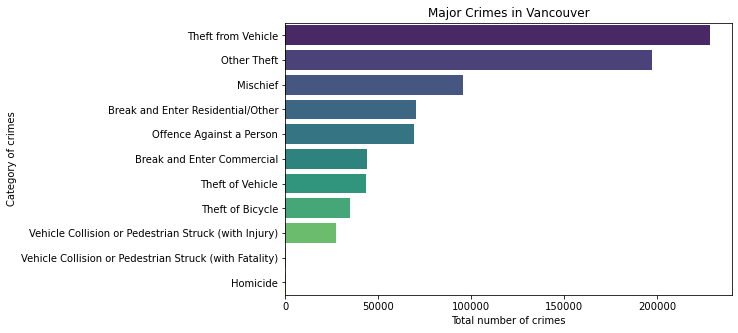

In [19]:
# Plotting various type of crimes
fig = plt.figure(figsize=(8,5))
sns.barplot(df_van['type'].value_counts(),df_van['type'].value_counts().index, palette = 'viridis')
plt.title('Major Crimes in Vancouver')
plt.ylabel('Category of crimes')
plt.xlabel('Total number of crimes')
plt.show()

In [20]:
# distribution of crimes as per type
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels= df_van['type'].value_counts().index,
                             values=df_van.type.value_counts())])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#555555', width=3)))
fig.show()

Q1. What is the trend in Vancouver's crime rate?

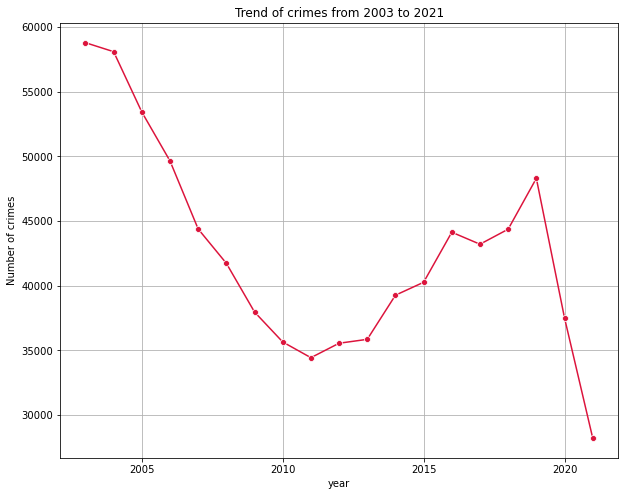

<Figure size 432x288 with 0 Axes>

In [21]:
# trend  of crimes from 2003 to 2021
year_count  = df_van['year'].value_counts()
plt.figure(figsize=(10,8))
ax = sns.lineplot(year_count.index, year_count.values,marker="o",color = 'crimson')
plt.title('Trend of crimes from 2003 to 2021')
plt.xlabel('year')
plt.ylabel('Number of crimes')
ax.locator_params(integer=True)
plt.grid()
plt.show()
plt.savefig('1.svg')

In [22]:
# yearly count of crime in Vancouver
# year number
year_num = sorted(df_van["year"].unique())

# type of crime
type_of_crime = sorted(df_van["type"].unique().tolist())

# create dataframe
crime_year = pd.DataFrame(columns =["year"]) 
crime_year["year"] = year_num
crime_year

for i in type_of_crime:
    new_crime = df_van[df_van["type"]== i]
    new_crime_count = new_crime["year"].value_counts(sort=False)
    new_crime_index = new_crime_count.index.tolist()
    new_crime_index, new_crime_count = zip(*sorted(zip(new_crime_index, new_crime_count)))
    crime_year[i] = new_crime_count
crime_year

year  Break and Enter Commercial  Break and Enter Residential/Other  \
0   2003                        3197                               6884   
1   2004                        3282                               6534   
2   2005                        2640                               5541   
3   2006                        2845                               5672   
4   2007                        2435                               4997   
5   2008                        2225                               4432   
6   2009                        1859                               3497   
7   2010                        1659                               3266   
8   2011                        1752                               3230   
9   2012                        1686                               3313   
10  2013                        1772                               3026   
11  2014                        2242                               3043   
12  2015                        2456                               3118   
13  2016                        2685                               2991   
14  2017                        2192                               2454   
15  2018                        2023                               2395   
16  2019                        2492                               2276   
17  2020                        2788                               2081   
18  2021                        1803                               1356   

    Homicide  Mischief  Offence Against a Person  Other Theft  \
0         18      6389                      3501        11426   
1         22      5598                      3794        11438   
2         22      5064                      3773        11359   
3         18      5181                      4346        10304   
4         19      4814                      4401         9725   
5         18      5274                      4224         9468   
6         18      4428                      3874         9472   
7         10      4514                      3752         9367   
8         15      4842                      3892         9390   
9          8      4236                      3786         9973   
10         7      4190                      3665        10287   
11         9      4517                      3157        10817   
12        15      4185                      3215        10615   
13        11      4592                      3195        12008   
14        17      5371                      3174        11812   
15        15      5735                      3126        11273   
16        12      5865                      3521        12372   
17        19      6113                      3742         8650   
18        15      4847                      3282         7375   

    Theft from Vehicle  Theft of Bicycle  Theft of Vehicle  \
0                17743              1418              6361   
1                18203              1230              6100   
2                16554              1416              5029   
3                14730              1467              3682   
4                12226              1203              3304   
5                11295              1176              2420   
6                10008              1641              1880   
7                 8614              1669              1466   
8                 7435              1517              1094   
9                 8096              1817              1151   
10                8336              2033              1033   
11               10141              2461              1291   
12               10547              3064              1372   
13               12814              2638              1480   
14               12955              2202              1496   
15               14998              2168              1148   
16               17013              2221              1378   
17               10422              1985               852   
18                6570  

In [23]:
crime_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   year                                                    19 non-null     int64
 1   Break and Enter Commercial                              19 non-null     int64
 2   Break and Enter Residential/Other                       19 non-null     int64
 3   Homicide                                                19 non-null     int64
 4   Mischief                                                19 non-null     int64
 5   Offence Against a Person                                19 non-null     int64
 6   Other Theft                                             19 non-null     int64
 7   Theft from Vehicle                                      19 non-null     int64
 8   Theft of Bicycle                                        19 non

In [24]:
# renaming column names
crime_year = crime_year.rename({'Break and Enter Commercial': 'break_and_enter_commercial', 'Break and Enter Residential/Other': 'break_and_enter_residential_other'
                ,'Homicide':'homicide','Mischief':'mischief','Offence Against a Person':'offence_against_a_person','Other Theft':'other_theft'
                ,'Theft from Vehicle':'theft_from_vehicle','Theft of Bicycle':'theft_of_bicycle','Theft of Vehicle':'theft_of_vehicle'
                ,'Vehicle Collision or Pedestrian Struck (with Fatality)':'vehicle_collision_or_pedestrian_struck_with_fatality'
                ,'Vehicle Collision or Pedestrian Struck (with Injury)':'vehicle_collision_or_pedestrian_struck_with_injury'}, axis=1)
crime_year

year  break_and_enter_commercial  break_and_enter_residential_other  \
0   2003                        3197                               6884   
1   2004                        3282                               6534   
2   2005                        2640                               5541   
3   2006                        2845                               5672   
4   2007                        2435                               4997   
5   2008                        2225                               4432   
6   2009                        1859                               3497   
7   2010                        1659                               3266   
8   2011                        1752                               3230   
9   2012                        1686                               3313   
10  2013                        1772                               3026   
11  2014                        2242                               3043   
12  2015                        2456                               3118   
13  2016                        2685                               2991   
14  2017                        2192                               2454   
15  2018                        2023                               2395   
16  2019                        2492                               2276   
17  2020                        2788                               2081   
18  2021                        1803                               1356   

    homicide  mischief  offence_against_a_person  other_theft  \
0         18      6389                      3501        11426   
1         22      5598                      3794        11438   
2         22      5064                      3773        11359   
3         18      5181                      4346        10304   
4         19      4814                      4401         9725   
5         18      5274                      4224         9468   
6         18      4428                      3874         9472   
7         10      4514                      3752         9367   
8         15      4842                      3892         9390   
9          8      4236                      3786         9973   
10         7      4190                      3665        10287   
11         9      4517                      3157        10817   
12        15      4185                      3215        10615   
13        11      4592                      3195        12008   
14        17      5371                      3174        11812   
15        15      5735                      3126        11273   
16        12      5865                      3521        12372   
17        19      6113                      3742         8650   
18        15      4847                      3282         7375   

    theft_from_vehicle  theft_of_bicycle  theft_of_vehicle  \
0                17743              1418              6361   
1                18203              1230              6100   
2                16554              1416              5029   
3                14730              1467              3682   
4                12226              1203              3304   
5                11295              1176              2420   
6                10008              1641              1880   
7                 8614              1669              1466   
8                 7435              1517              1094   
9                 8096              1817              1151   
10                8336              2033              1033   
11               10141              2461              1291   
12               10547              3064              1372   
13               12814              2638              1480   
14               12955              2202              1496   
15               14998              2168              1148   
16               17013              2221              1378   
17               10422              1985               852   
18                6570  

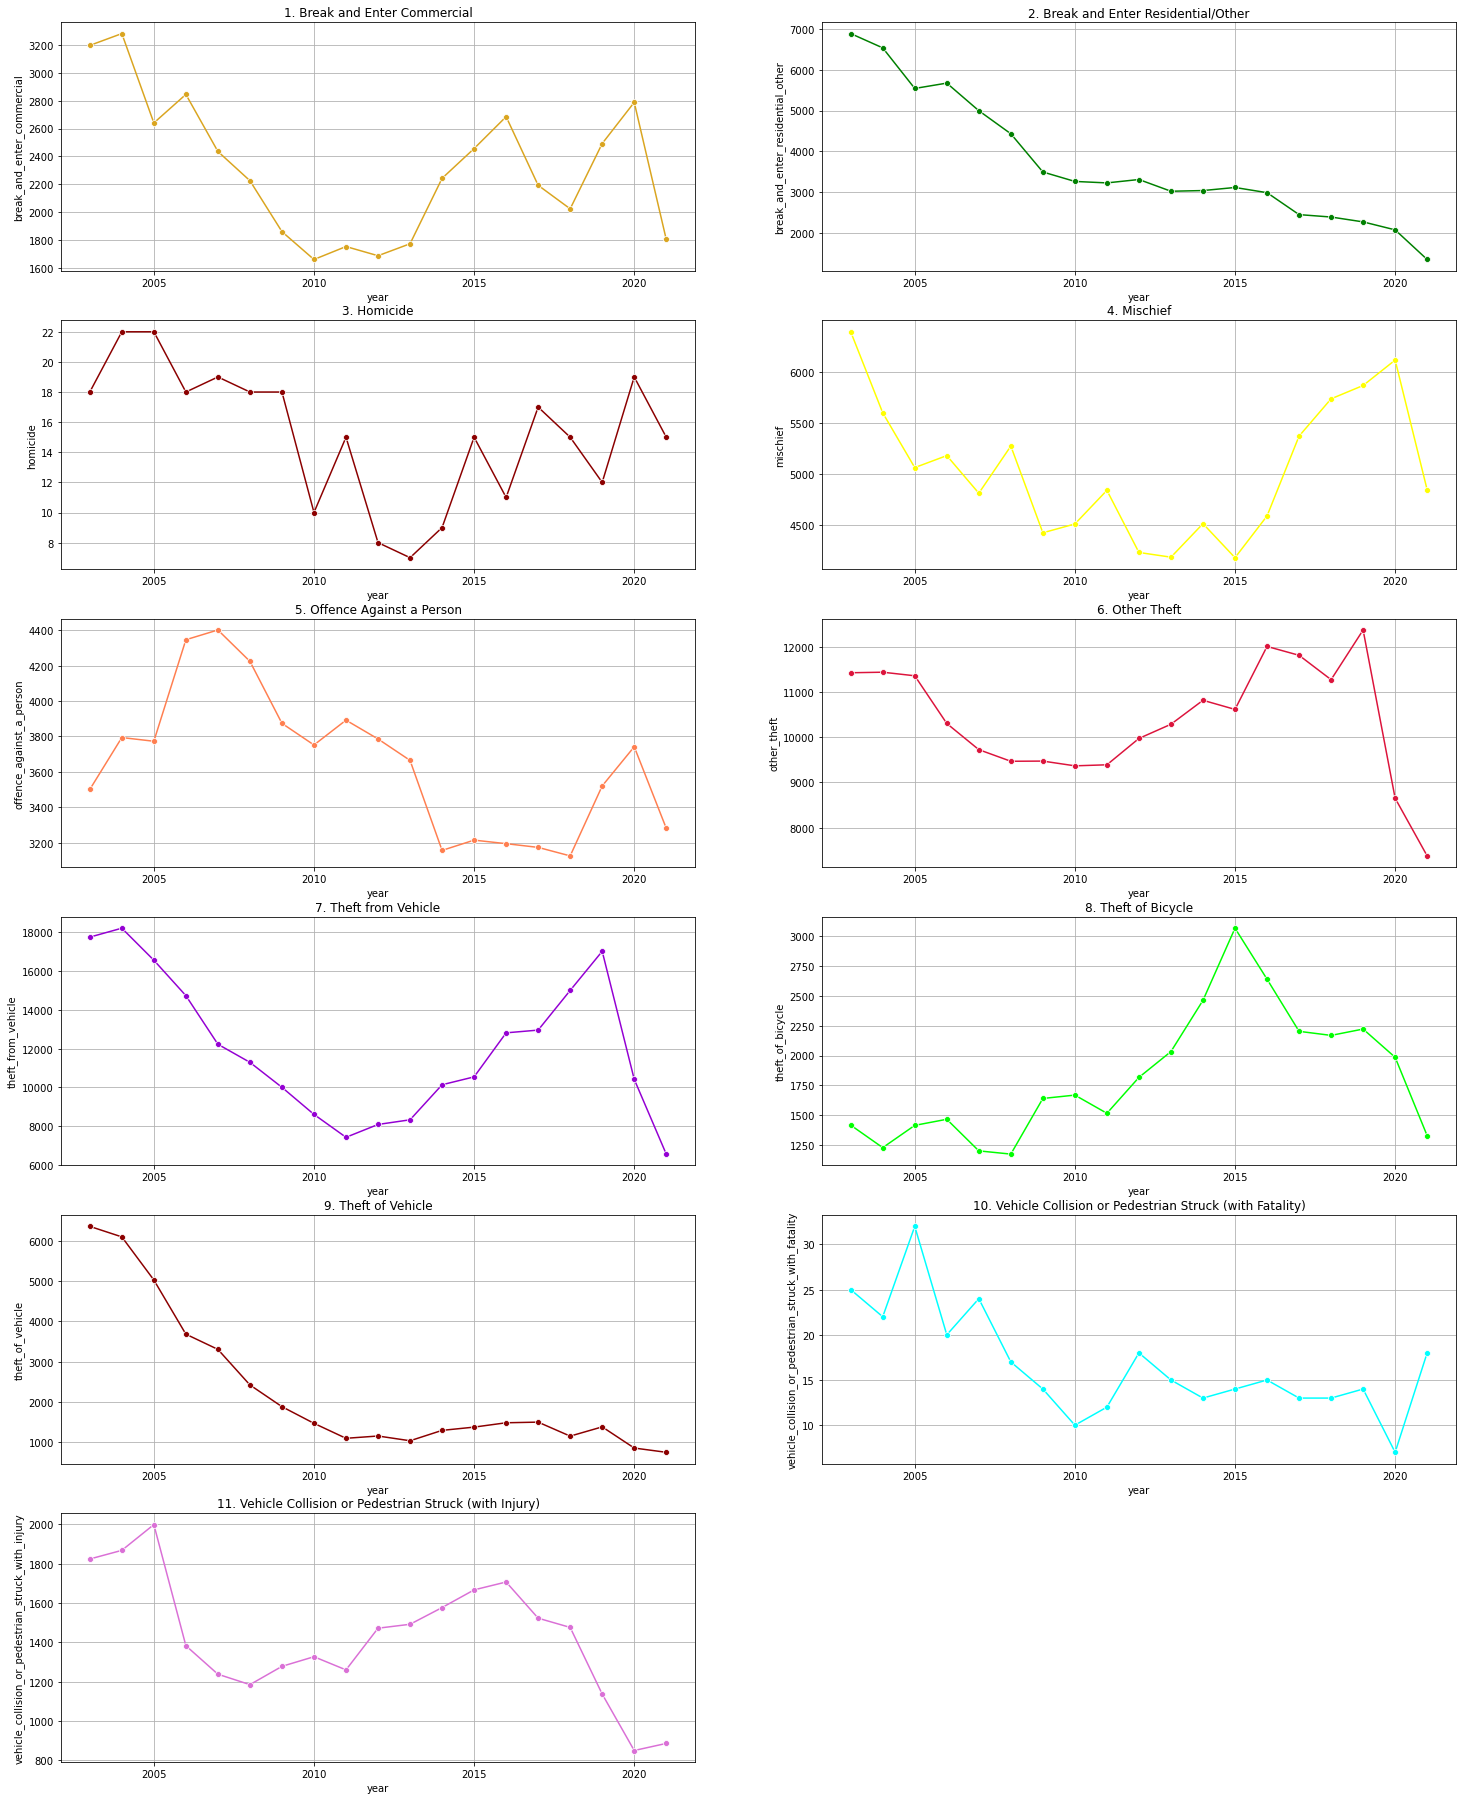

In [25]:
# plotting distribution of each crime by type from 2003 t0 2021
fig, ax = plt.subplots(6, 2, figsize=(25,32))

ax[0,0].set_title('1. Break and Enter Commercial')
sns.lineplot(ax=ax[0,0], x = crime_year.year, y =  crime_year.break_and_enter_commercial, color = 'goldenrod',marker="o")
ax[0,0].locator_params(integer=True)
ax[0,0].grid()

ax[0,1].set_title('2. Break and Enter Residential/Other')
sns.lineplot(ax=ax[0,1], x = crime_year.year, y =  crime_year.break_and_enter_residential_other, color = 'g',marker="o")
ax[0,1].locator_params(integer=True)
ax[0,1].grid()

ax[1,0].set_title('3. Homicide')
sns.lineplot(ax=ax[1,0], x =  crime_year.year, y =  crime_year.homicide, color = 'darkred',marker="o")
ax[1,0].locator_params(integer=True)
ax[1,0].grid()

ax[1,1].set_title('4. Mischief')
sns.lineplot(ax=ax[1,1], x = crime_year.year, y = crime_year.mischief, color = 'yellow',marker="o")
ax[1,1].locator_params(integer=True)
ax[1,1].grid()

ax[2,0].set_title('5. Offence Against a Person')
sns.lineplot(ax=ax[2,0], x = crime_year.year, y =  crime_year.offence_against_a_person, color = 'coral',marker="o")
ax[2,0].locator_params(integer=True)
ax[2,0].grid()

ax[2,1].set_title('6. Other Theft')
sns.lineplot(ax=ax[2,1], x = crime_year.year, y =  crime_year.other_theft, color = 'crimson',marker="o")
ax[2,1].locator_params(integer=True)
ax[2,1].grid()

ax[3,0].set_title('7. Theft from Vehicle')
sns.lineplot(ax=ax[3,0], x = crime_year.year, y =  crime_year.theft_from_vehicle, color = 'darkviolet',marker="o")
ax[3,0].locator_params(integer=True)
ax[3,0].grid()

ax[3,1].set_title('8. Theft of Bicycle')
sns.lineplot(ax=ax[3,1], x = crime_year.year, y =  crime_year.theft_of_bicycle, color = 'lime',marker="o")
ax[3,1].locator_params(integer=True)
ax[3,1].grid()

ax[4,0].set_title('9. Theft of Vehicle')
sns.lineplot(ax=ax[4,0], x = crime_year.year, y =  crime_year.theft_of_vehicle, color = 'darkred',marker="o")
ax[4,0].locator_params(integer=True)
ax[4,0].grid()

ax[4,1].set_title('10. Vehicle Collision or Pedestrian Struck (with Fatality)')
sns.lineplot(ax=ax[4,1], x = crime_year.year, y =  crime_year.vehicle_collision_or_pedestrian_struck_with_fatality, color = 'cyan',marker="o")
ax[4,1].locator_params(integer=True)
ax[4,1].grid()

ax[5,0].set_title('11. Vehicle Collision or Pedestrian Struck (with Injury)')
sns.lineplot(ax=ax[5,0], x = crime_year.year, y =  crime_year.vehicle_collision_or_pedestrian_struck_with_injury, color = 'orchid',marker="o")
fig.delaxes(ax[5,1])
ax[5,0].locator_params(integer=True)
ax[5,0].grid()

In [26]:
# percentage change in crimes from 2003 to 2021
initial_year = crime_year.iloc[0,1:]
crime_percent_change = 100 * round((crime_year.iloc[:,1:] - initial_year) / initial_year, 2)
crime_percent_change["year"] = year_num
crime_percent_change

break_and_enter_commercial  break_and_enter_residential_other  homicide  \
0                          0.0                                0.0       0.0   
1                          3.0                               -5.0      22.0   
2                        -17.0                              -20.0      22.0   
3                        -11.0                              -18.0       0.0   
4                        -24.0                              -27.0       6.0   
5                        -30.0                              -36.0       0.0   
6                        -42.0                              -49.0       0.0   
7                        -48.0                              -53.0     -44.0   
8                        -45.0                              -53.0     -17.0   
9                        -47.0                              -52.0     -56.0   
10                       -45.0                              -56.0     -61.0   
11                       -30.0                              -56.0     -50.0   
12                       -23.0                              -55.0     -17.0   
13                       -16.0                              -57.0     -39.0   
14                       -31.0                              -64.0      -6.0   
15                       -37.0                              -65.0     -17.0   
16                       -22.0                              -67.0     -33.0   
17                       -13.0                              -70.0       6.0   
18                       -44.0                              -80.0     -17.0   

    mischief  offence_against_a_person  other_theft  theft_from_vehicle  \
0        0.0                       0.0          0.0                 0.0   
1      -12.0                       8.0          0.0                 3.0   
2      -21.0                       8.0         -1.0                -7.0   
3      -19.0                      24.0        -10.0               -17.0   
4      -25.0                      26.0        -15.0               -31.0   
5      -17.0                      21.0        -17.0               -36.0   
6      -31.0                      11.0        -17.0               -44.0   
7      -29.0                       7.0        -18.0               -51.0   
8      -24.0                      11.0        -18.0               -58.0   
9      -34.0                       8.0        -13.0               -54.0   
10     -34.0                       5.0        -10.0               -53.0   
11     -29.0                     -10.0         -5.0               -43.0   
12     -34.0                      -8.0         -7.0               -41.0   
13     -28.0                      -9.0          5.0               -28.0   
14     -16.0                      -9.0          3.0               -27.0   
15     -10.0                     -11.0         -1.0               -15.0   
16      -8.0                       1.0          8.0                -4.0   
17      -4.0                       7.0        -24.0               -41.0   
18     -24.0                      -6.0        -35.0               -63.0   

    theft_of_bicycle  theft_of_vehicle  \
0                0.0               0.0   
1              -13.0              -4.0   
2               -0.0             -21.0   
3                3.0             -42.0   
4              -15.0             -48.0   
5              -17.0             -62.0   
6               16.0             -70.0   
7               18.0             -77.0   
8                7.0             -83.0   
9               28.0             -82.0   
10              43.0             -84.0   
11              74.0             -80.0   
12             116.0             -78.0   
13              86.0             -77.0   
14              55.0             -76.0   
15              53.0             -82.0   
16              57.0             -78.0   
17              40.0             -87.0   
18              -6.0             -88.0   

    vehicle_collision_or_pedestrian_struck_with_fatality  \
0                    

Q2. From 2003 to 2021, what is the percentage change in each form of crime in Vancouver?

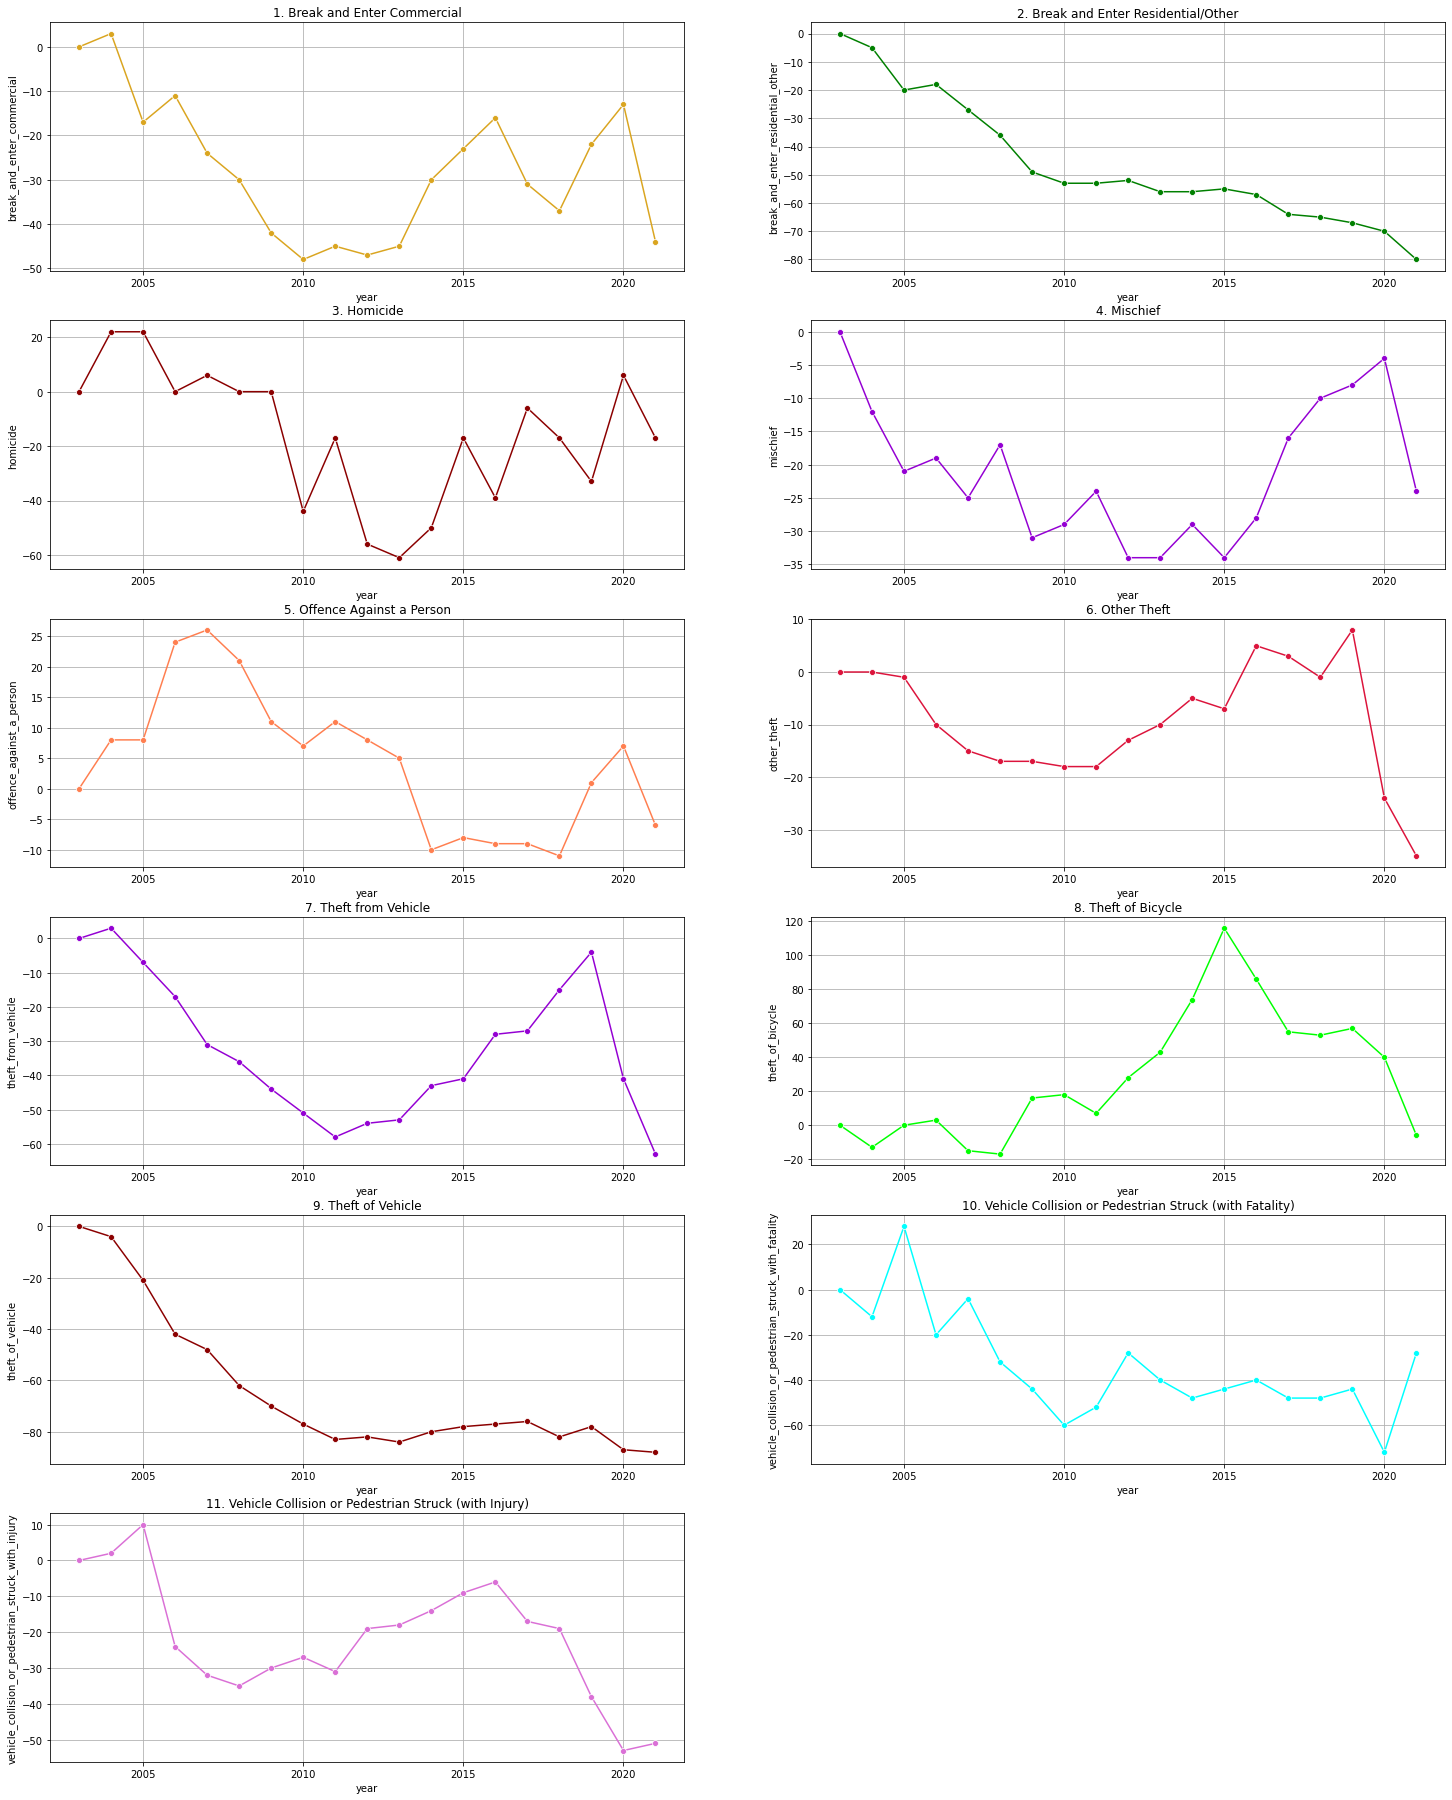

In [27]:
# plotting percentage change of each crime by type from 2003 t0 2021
fig, ax = plt.subplots(6, 2, figsize=(25,32))
ax[0,0].set_title('1. Break and Enter Commercial')
sns.lineplot(ax=ax[0,0], x = crime_percent_change.year, y =  crime_percent_change.break_and_enter_commercial, color = 'goldenrod',marker="o")
ax[0,0].locator_params(integer=True)
ax[0,0].grid()

ax[0,1].set_title('2. Break and Enter Residential/Other')
sns.lineplot(ax=ax[0,1], x = crime_percent_change.year, y =  crime_percent_change.break_and_enter_residential_other, color = 'g',marker="o")
ax[0,1].locator_params(integer=True)
ax[0,1].grid()

ax[1,0].set_title('3. Homicide')
sns.lineplot(ax=ax[1,0], x =  crime_percent_change.year, y =  crime_percent_change.homicide, color = 'darkred',marker="o")
ax[1,0].locator_params(integer=True)
ax[1,0].grid()

ax[1,1].set_title('4. Mischief')
sns.lineplot(ax=ax[1,1], x = crime_percent_change.year, y = crime_percent_change.mischief, color = 'darkviolet',marker="o")
ax[1,1].locator_params(integer=True)
ax[1,1].grid()

ax[2,0].set_title('5. Offence Against a Person')
sns.lineplot(ax=ax[2,0], x = crime_percent_change.year, y =  crime_percent_change.offence_against_a_person, color = 'coral',marker="o")
ax[2,0].locator_params(integer=True)
ax[2,0].grid()

ax[2,1].set_title('6. Other Theft')
sns.lineplot(ax=ax[2,1], x = crime_percent_change.year, y =  crime_percent_change.other_theft, color = 'crimson',marker="o")
ax[2,1].locator_params(integer=True)
ax[2,1].grid()

ax[3,0].set_title('7. Theft from Vehicle')
sns.lineplot(ax=ax[3,0], x = crime_percent_change.year, y =  crime_percent_change.theft_from_vehicle, color = 'darkviolet',marker="o")
ax[3,0].locator_params(integer=True)
ax[3,0].grid()

ax[3,1].set_title('8. Theft of Bicycle')
sns.lineplot(ax=ax[3,1], x = crime_percent_change.year, y =  crime_percent_change.theft_of_bicycle, color = 'lime',marker="o")
ax[3,1].locator_params(integer=True)
ax[3,1].grid()

ax[4,0].set_title('9. Theft of Vehicle')
sns.lineplot(ax=ax[4,0], x = crime_percent_change.year, y =  crime_percent_change.theft_of_vehicle, color = 'darkred',marker="o")
ax[4,0].locator_params(integer=True)
ax[4,0].grid()

ax[4,1].set_title('10. Vehicle Collision or Pedestrian Struck (with Fatality)')
sns.lineplot(ax=ax[4,1], x = crime_percent_change.year, y =  crime_percent_change.vehicle_collision_or_pedestrian_struck_with_fatality, color = 'cyan',marker="o")
ax[4,1].locator_params(integer=True)
ax[4,1].grid()

ax[5,0].set_title('11. Vehicle Collision or Pedestrian Struck (with Injury)')
sns.lineplot(ax=ax[5,0], x = crime_percent_change.year, y =  crime_percent_change.vehicle_collision_or_pedestrian_struck_with_injury, color = 'orchid',marker="o")
fig.delaxes(ax[5,1])
ax[5,0].locator_params(integer=True)
ax[5,0].grid()

plt.savefig('2.svg')


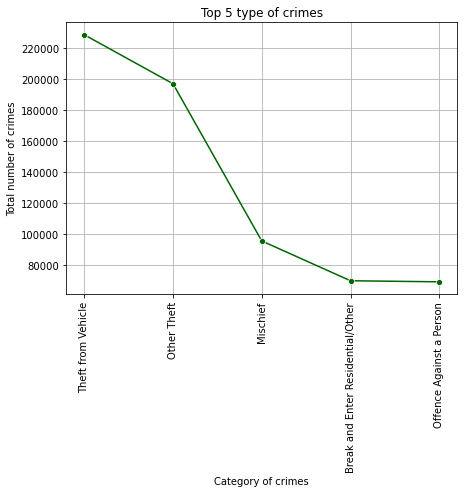

In [28]:
# Plotting the top 5 crime types in Vancouver
type_count5  = df_van['type'].value_counts()
type_count5 = type_count5[:5,]
plt.figure(figsize=(7,5))
sns.lineplot(type_count5.index, type_count5.values,marker="o",color = 'darkgreen')
plt.title('Top 5 type of crimes')
plt.xticks(rotation = 90)
plt.xlabel('Category of crimes')
plt.ylabel('Total number of crimes')
plt.grid()
plt.show()


Q3. On which months in which more than 5000 crimes occurred?

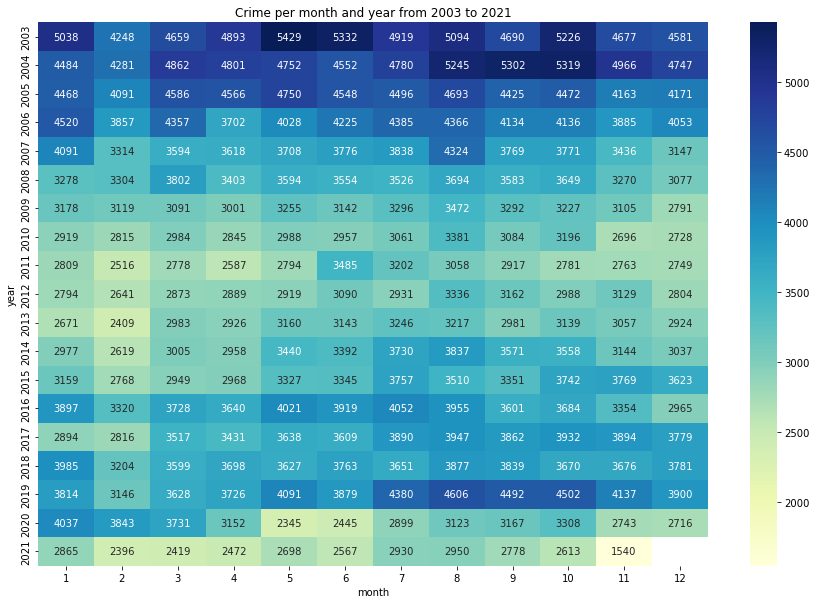

<Figure size 432x288 with 0 Axes>

In [29]:
# Plotting month vs year crime count of Vancouver from 2003 to 2021
crime_count = df_van.groupby(["month", "year"]).size().reset_index(name="total")
crime_heat = crime_count.pivot('year',"month",'total')
fig = plt.figure(figsize=(15,10))
sns.heatmap(crime_heat, annot=True,cmap = 'YlGnBu' ,fmt="2g")
plt.title('Crime per month and year from 2003 to 2021')
plt.show()
plt.savefig('3.svg')

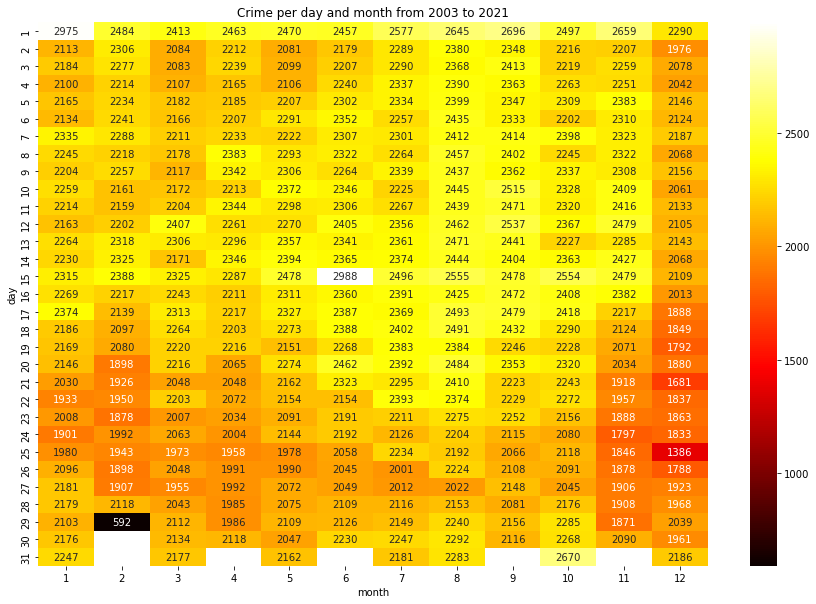

In [30]:
# Plotting day vs month crime count of Vancouver from 2003 to 2021
crime_count = df_van.groupby(["day","month"]).size().reset_index(name="total")
crime_heat = crime_count.pivot('day',"month",'total')
fig = plt.figure(figsize=(15,10))
sns.heatmap(crime_heat, annot=True,cmap = 'hot' ,fmt="2g")
plt.title('Crime per day and month from 2003 to 2021')
plt.show()

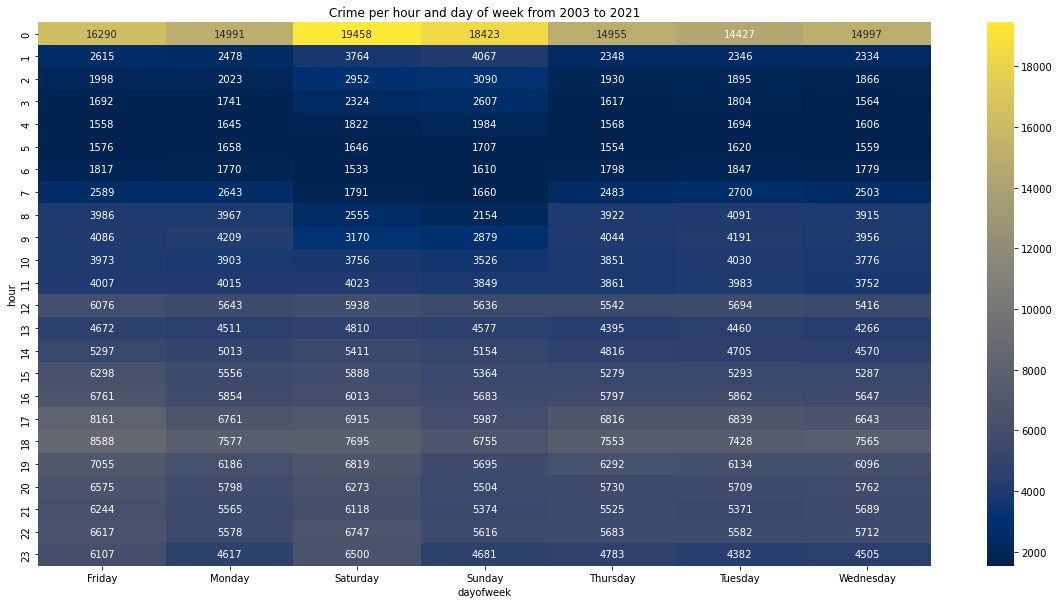

In [31]:
# Plotting hour vs day crime count of Vancouver from 2003 to 2021
crime_count = df_van.groupby(["hour","dayofweek"]).size().reset_index(name="total")
crime_heat = crime_count.pivot('hour',"dayofweek",'total')
fig = plt.figure(figsize=(20,10))
sns.heatmap(crime_heat, annot=True,cmap = 'cividis' ,fmt="2g")
plt.title('Crime per hour and day of week from 2003 to 2021')
plt.show()

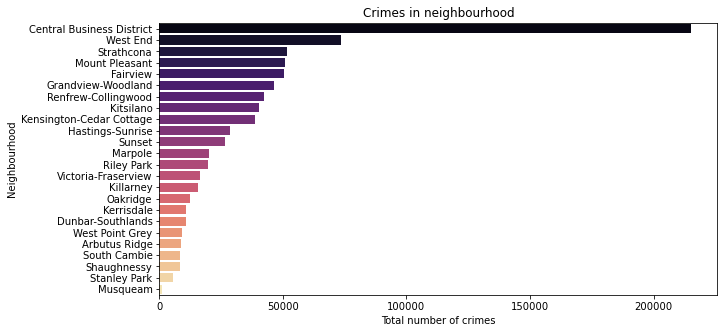

In [32]:
# Plotting crimes of neighbourhood of Vancouver
neigh_count  = df_van['neighbourhood'].value_counts()
neigh_count = neigh_count[:,]
plt.figure(figsize=(10,5))
sns.barplot(neigh_count.values,neigh_count.index, palette = 'magma')
plt.title('Crimes in neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Total number of crimes')
plt.show()

Q4. Which are the most dangerous neighbourhoods in Vancouver?

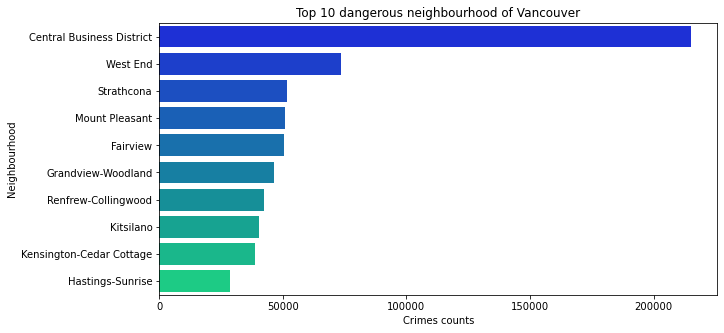

In [33]:
# Plotting top 10 dangerous neighbourhood of Vancouver
neigh_count  = df_van['neighbourhood'].value_counts()
neigh_count = neigh_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(neigh_count.values,neigh_count.index, palette = 'winter')
plt.title('Top 10 dangerous neighbourhood of Vancouver')
plt.ylabel('Neighbourhood')
plt.xlabel('Crimes counts')
plt.show()

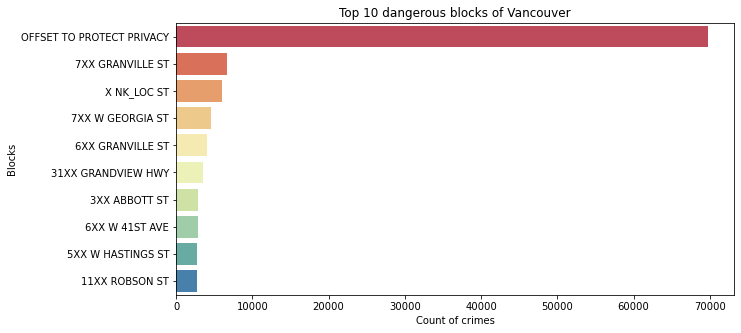

In [34]:
# Plotting top 10 dangerous blocks of Vancouver
add_count  = df_van['address'].value_counts()
add_count = add_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(add_count.values,add_count.index, palette = 'Spectral')
plt.title('Top 10 dangerous blocks of Vancouver')
plt.ylabel('Blocks')
plt.xlabel('Count of crimes')
plt.show()

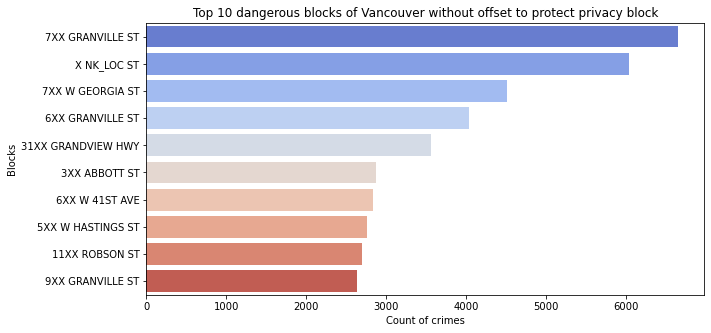

In [35]:
# Plotting top 10 dangerous blocks of Vancouver without offset to protect privacy block
add_count  = df_van['address'].value_counts()
add_count = add_count[1:11,]
plt.figure(figsize=(10,5))
sns.barplot(add_count.values,add_count.index, palette = 'coolwarm')
plt.title('Top 10 dangerous blocks of Vancouver without offset to protect privacy block')
plt.ylabel('Blocks')
plt.xlabel('Count of crimes')
plt.show()

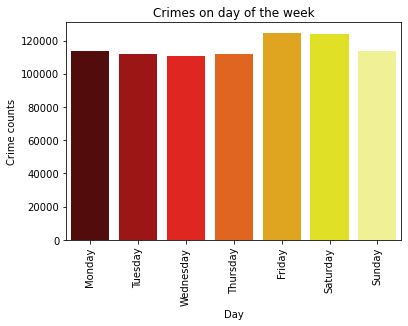

In [36]:
# Plotting crimes occured on day of the week
day_count = pd.Categorical(df_van['dayofweek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
sns.countplot(day_count, palette = 'hot')
plt.title('Crimes on day of the week')
plt.xticks(rotation = 90)
plt.xlabel('Day')
plt.ylabel('Crime counts')
plt.show()


Q5. At what hour the theft from vehicle is at peak?

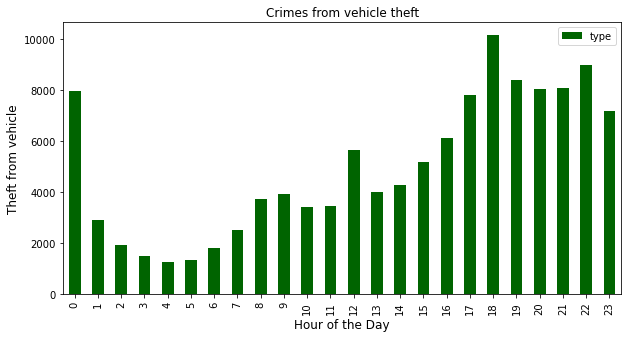

In [37]:
# plotting at what time crimes happened from vehicle theft
vehicle_theft =  df_van[(df_van['year']) & (df_van['type'] == "Theft from Vehicle")]
vehicle_theft

vehicle_hour = vehicle_theft[['type','hour']].groupby(['hour'],as_index=False).count()
vehicle_hour

vehicle_hour.plot(kind='bar', x='hour', figsize=(10, 5), color = 'darkgreen')
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Theft from vehicle", fontsize=12)
plt.title("Crimes from vehicle theft")
plt.show()


3. Feature engineering and machine learning models

In [38]:
# feature engineering
# encoding the categorical features
from sklearn import preprocessing
df_van1 = df_van.copy()
df_van1
for i in ['type', 'address', 'neighbourhood', 'dayofweek']:
    df_van1[i] = preprocessing.LabelEncoder().fit_transform(df_van1[i])
df_van1

type  year  month  day  hour  minute  address  neighbourhood  \
1          0  2019      3    7     2       6      258              3   
2          0  2019      8   27     4      12       15             22   
3          0  2021      4   26     4      44       15             22   
4          0  2014      8    8     5      13       15             22   
5          0  2020      7   28    19      12       15             22   
...      ...   ...    ...  ...   ...     ...      ...            ...   
810979    10  2003      9    1    20      45    23003             15   
810980    10  2005      7   20    18      57    23003             15   
810981    10  2016      6   20    18      11    23003             15   
810982    10  2013     12    3     9      49    23003             15   
810983    10  2013     12   27    14      40    23003             15   

          longitude      latitude       date      time  dayofweek  
1       490612.9648  5.457110e+06 2019-03-07  02:06:00          4  
2       491007.7798  5.459174e+06 2019-08-27  04:12:00          5  
3       491007.7798  5.459174e+06 2021-04-26  04:44:00          1  
4       491015.9434  5.459166e+06 2014-08-08  05:13:00          0  
5       491015.9434  5.459166e+06 2020-07-28  19:12:00          5  
...             ...           ...        ...       ...        ...  
810979  491786.0000  5.455143e+06 2003-09-01  20:45:00          1  
810980  491786.0000  5.455143e+06 2005-07-20  18:57:00          6  
810981  491786.0000  5.455143e+06 2016-06-20  18:11:00          1  
810982  491835.0000  5.455126e+06 2013-12-03  09:49:00          5  
810983  491835.0000  5.455126e+06 2013-12-27  14:40:00          0  

[810837 rows x 13 columns]

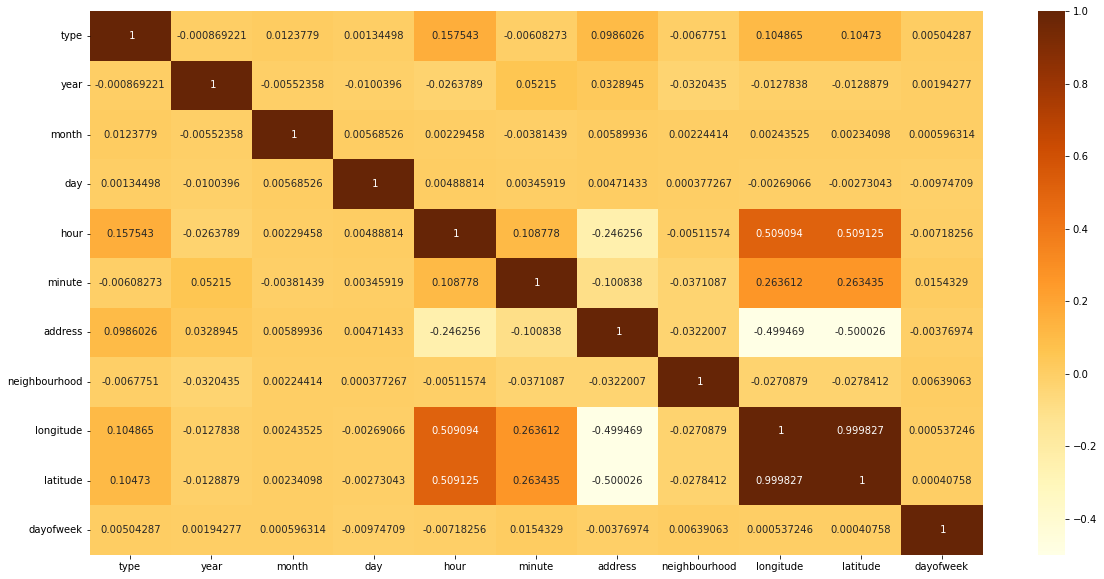

In [39]:
# plotting correlation matrix
corr_mat = df_van1.corr()
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,cmap = 'YlOrBr' ,fmt="2g")
plt.show()

In [40]:
# sorting the correlation matrix
corr_pairs = corr_mat.unstack()
corr_pairs

type       type             1.000000
           year            -0.000869
           month            0.012378
           day              0.001345
           hour             0.157543
                              ...   
dayofweek  address         -0.003770
           neighbourhood    0.006391
           longitude        0.000537
           latitude         0.000408
           dayofweek        1.000000
Length: 121, dtype: float64

In [41]:
# sorting using sort_values() method
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

address    latitude    -0.500026
latitude   address     -0.500026
address    longitude   -0.499469
longitude  address     -0.499469
address    hour        -0.246256
                          ...   
day        day          1.000000
month      month        1.000000
year       year         1.000000
latitude   latitude     1.000000
dayofweek  dayofweek    1.000000
Length: 121, dtype: float64

In [42]:
# selecting negative pairs
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

address        latitude        -0.500026
latitude       address         -0.500026
address        longitude       -0.499469
longitude      address         -0.499469
address        hour            -0.246256
hour           address         -0.246256
address        minute          -0.100838
minute         address         -0.100838
neighbourhood  minute          -0.037109
minute         neighbourhood   -0.037109
address        neighbourhood   -0.032201
neighbourhood  address         -0.032201
               year            -0.032043
year           neighbourhood   -0.032043
neighbourhood  latitude        -0.027841
latitude       neighbourhood   -0.027841
longitude      neighbourhood   -0.027088
neighbourhood  longitude       -0.027088
hour           year            -0.026379
year           hour            -0.026379
               latitude        -0.012888
latitude       year            -0.012888
longitude      year            -0.012784
year           longitude       -0.012784
               d

In [43]:
# selecting strong pairs
strong_pairs = sorted_pairs[sorted_pairs > 0.5]
print(strong_pairs)

longitude      hour             0.509094
hour           longitude        0.509094
               latitude         0.509125
latitude       hour             0.509125
longitude      latitude         0.999827
latitude       longitude        0.999827
type           type             1.000000
minute         minute           1.000000
longitude      longitude        1.000000
neighbourhood  neighbourhood    1.000000
address        address          1.000000
hour           hour             1.000000
day            day              1.000000
month          month            1.000000
year           year             1.000000
latitude       latitude         1.000000
dayofweek      dayofweek        1.000000
dtype: float64


In [44]:
df_van1

type  year  month  day  hour  minute  address  neighbourhood  \
1          0  2019      3    7     2       6      258              3   
2          0  2019      8   27     4      12       15             22   
3          0  2021      4   26     4      44       15             22   
4          0  2014      8    8     5      13       15             22   
5          0  2020      7   28    19      12       15             22   
...      ...   ...    ...  ...   ...     ...      ...            ...   
810979    10  2003      9    1    20      45    23003             15   
810980    10  2005      7   20    18      57    23003             15   
810981    10  2016      6   20    18      11    23003             15   
810982    10  2013     12    3     9      49    23003             15   
810983    10  2013     12   27    14      40    23003             15   

          longitude      latitude       date      time  dayofweek  
1       490612.9648  5.457110e+06 2019-03-07  02:06:00          4  
2       491007.7798  5.459174e+06 2019-08-27  04:12:00          5  
3       491007.7798  5.459174e+06 2021-04-26  04:44:00          1  
4       491015.9434  5.459166e+06 2014-08-08  05:13:00          0  
5       491015.9434  5.459166e+06 2020-07-28  19:12:00          5  
...             ...           ...        ...       ...        ...  
810979  491786.0000  5.455143e+06 2003-09-01  20:45:00          1  
810980  491786.0000  5.455143e+06 2005-07-20  18:57:00          6  
810981  491786.0000  5.455143e+06 2016-06-20  18:11:00          1  
810982  491835.0000  5.455126e+06 2013-12-03  09:49:00          5  
810983  491835.0000  5.455126e+06 2013-12-27  14:40:00          0  

[810837 rows x 13 columns]

Naive Bayes Classification

In [45]:
X = df_van1[['hour','day','longitude','latitude']]
y = df_van1[['type']]

In [46]:
# splitting the data into 80: 20 for training and testing respectively
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        hour  day    longitude      latitude
148466    17    1  488119.4912  5.457388e+06
483454    10   25  491058.2284  5.458959e+06
154349    22   10  492850.4943  5.458844e+06
710954    20    6  494574.6678  5.456824e+06
72300      6    3  496274.2114  5.454103e+06
...      ...  ...          ...           ...
359833    18   23  497308.7697  5.456156e+06
152319    12   22  489910.4465  5.456345e+06
117956     1   26  490614.5474  5.453054e+06
435879    10   29  491218.8365  5.458801e+06
305761    23   28  489973.7858  5.458951e+06

[648669 rows x 4 columns]
        hour  day    longitude      latitude
808312    15   21  485671.0000  5.453596e+06
480309     0   28  493948.7818  5.456834e+06
713576     9   21  490415.8518  5.459959e+06
57142     21   12  490293.5371  5.459875e+06
325471    15    4  489183.9606  5.457261e+06
...      ...  ...          ...           ...
420209    13   23  491372.9375  5.453423e+06
86877     17   25  486074.0285  5.456143e+06
110402     9   28  490794.61

In [47]:
# initializing the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [48]:
# predicting on test data
prediction = classifier.predict(x_test)
prediction

array([1, 5, 5, ..., 6, 6, 5])

In [49]:
# importing and printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8928
           1       0.14      0.06      0.09     13918
           2       0.00      0.00      0.00        54
           3       0.00      0.00      0.00     19069
           4       1.00      1.00      1.00     13714
           5       0.33      0.63      0.43     39545
           6       0.30      0.43      0.35     46040
           7       0.00      0.00      0.00      6929
           8       0.00      0.00      0.00      8543
           9       0.00      0.00      0.00        61
          10       0.00      0.00      0.00      5367

    accuracy                           0.37    162168
   macro avg       0.16      0.19      0.17    162168
weighted avg       0.26      0.37      0.30    162168



Decision Tree Clasification

In [50]:
x = df_van1[['hour','day','longitude','latitude']]
y = df_van1[['type']]

In [51]:
# splitting the data into 80: 20 for training and testing respectively
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        hour  day    longitude      latitude
148466    17    1  488119.4912  5.457388e+06
483454    10   25  491058.2284  5.458959e+06
154349    22   10  492850.4943  5.458844e+06
710954    20    6  494574.6678  5.456824e+06
72300      6    3  496274.2114  5.454103e+06
...      ...  ...          ...           ...
359833    18   23  497308.7697  5.456156e+06
152319    12   22  489910.4465  5.456345e+06
117956     1   26  490614.5474  5.453054e+06
435879    10   29  491218.8365  5.458801e+06
305761    23   28  489973.7858  5.458951e+06

[648669 rows x 4 columns]
        hour  day    longitude      latitude
808312    15   21  485671.0000  5.453596e+06
480309     0   28  493948.7818  5.456834e+06
713576     9   21  490415.8518  5.459959e+06
57142     21   12  490293.5371  5.459875e+06
325471    15    4  489183.9606  5.457261e+06
...      ...  ...          ...           ...
420209    13   23  491372.9375  5.453423e+06
86877     17   25  486074.0285  5.456143e+06
110402     9   28  490794.61

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
# initializing the model
prediction1 = classifier.predict(x_test)
prediction1

array([6, 3, 8, ..., 5, 3, 6])

In [54]:
# getting score of the model
classifier.score(x_test,y_test)

0.44550096196536926

In [55]:
# printing the classification report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26      8928
           1       0.26      0.27      0.26     13918
           2       0.00      0.00      0.00        54
           3       0.22      0.23      0.23     19069
           4       1.00      1.00      1.00     13714
           5       0.58      0.59      0.59     39545
           6       0.46      0.44      0.45     46040
           7       0.11      0.11      0.11      6929
           8       0.12      0.13      0.12      8543
           9       0.01      0.02      0.02        61
          10       0.52      0.48      0.50      5367

    accuracy                           0.45    162168
   macro avg       0.32      0.32      0.32    162168
weighted avg       0.45      0.45      0.45    162168



4. Time series analysis using Holt-winters forecasting

Q6. What can we expect in terms of crime in Vancouver in the future?

In [56]:
# grouping date and crimes occured
date_count = df_van.groupby(['date']).size().reset_index(name="crimes")
date_count

date  crimes
0    2003-01-01     223
1    2003-01-02     161
2    2003-01-03     181
3    2003-01-04     161
4    2003-01-05     131
...         ...     ...
6893 2021-11-15      86
6894 2021-11-16      68
6895 2021-11-17      68
6896 2021-11-18      37
6897 2021-11-19       5

[6898 rows x 2 columns]

In [57]:
#checking for null values
date_count.isnull().sum()

date      0
crimes    0
dtype: int64

In [58]:
# converting date column as index
date_count = date_count.groupby('date').sum()
date_count

crimes
date              
2003-01-01     223
2003-01-02     161
2003-01-03     181
2003-01-04     161
2003-01-05     131
...            ...
2021-11-15      86
2021-11-16      68
2021-11-17      68
2021-11-18      37
2021-11-19       5

[6898 rows x 1 columns]

In [59]:
# resampling
date_count = date_count.resample(rule = 'MS').sum()
date_count

crimes
date              
2003-01-01    5038
2003-02-01    4248
2003-03-01    4659
2003-04-01    4893
2003-05-01    5429
...            ...
2021-07-01    2930
2021-08-01    2950
2021-09-01    2778
2021-10-01    2613
2021-11-01    1540

[227 rows x 1 columns]

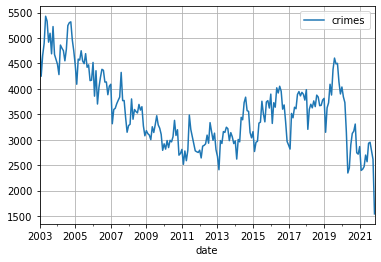

In [60]:
date_count.plot()
plt.grid()

In [61]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

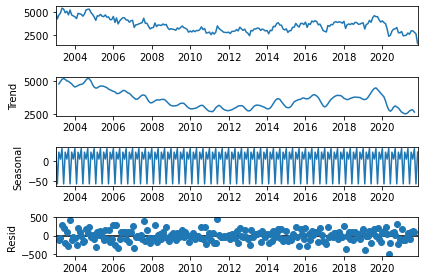

In [62]:
seasonal_decompose(date_count,model = 'additive',freq = 4).plot();

In [63]:
#splitting the data
train = date_count.iloc[:182]
test = date_count.iloc[182:]

In [64]:
train

crimes
date              
2003-01-01    5038
2003-02-01    4248
2003-03-01    4659
2003-04-01    4893
2003-05-01    5429
...            ...
2017-10-01    3932
2017-11-01    3894
2017-12-01    3779
2018-01-01    3985
2018-02-01    3204

[182 rows x 1 columns]

In [65]:
test

crimes
date              
2018-03-01    3599
2018-04-01    3698
2018-05-01    3627
2018-06-01    3763
2018-07-01    3651
2018-08-01    3877
2018-09-01    3839
2018-10-01    3670
2018-11-01    3676
2018-12-01    3781
2019-01-01    3814
2019-02-01    3146
2019-03-01    3628
2019-04-01    3726
2019-05-01    4091
2019-06-01    3879
2019-07-01    4380
2019-08-01    4606
2019-09-01    4492
2019-10-01    4502
2019-11-01    4137
2019-12-01    3900
2020-01-01    4037
2020-02-01    3843
2020-03-01    3731
2020-04-01    3152
2020-05-01    2345
2020-06-01    2445
2020-07-01    2899
2020-08-01    3123
2020-09-01    3167
2020-10-01    3308
2020-11-01    2743
2020-12-01    2716
2021-01-01    2865
2021-02-01    2396
2021-03-01    2419
2021-04-01    2472
2021-05-01    2698
2021-06-01    2567
2021-07-01    2930
2021-08-01    2950
2021-09-01    2778
2021-10-01    2613
2021-11-01    1540

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [67]:
# Initializing the model
hwmodel = ExponentialSmoothing(date_count.crimes,trend = 'add', seasonal = 'mul',seasonal_periods = 4).fit()

In [68]:
# forecasting
pred = hwmodel.forecast(24)
pred

2021-12-01    1806.977489
2022-01-01    1727.601349
2022-02-01    1578.363086
2022-03-01    1579.872837
2022-04-01    1505.851854
2022-05-01    1427.187749
2022-06-01    1291.426732
2022-07-01    1278.987249
2022-08-01    1204.726218
2022-09-01    1126.774149
2022-10-01    1004.490378
2022-11-01     978.101661
2022-12-01     903.600583
2023-01-01     826.360549
2023-02-01     717.554023
2023-03-01     677.216072
2023-04-01     602.474948
2023-05-01     525.946948
2023-06-01     430.617669
2023-07-01     376.330484
2023-08-01     301.349312
2023-09-01     225.533348
2023-10-01     143.681314
2023-11-01      75.444896
Freq: MS, dtype: float64

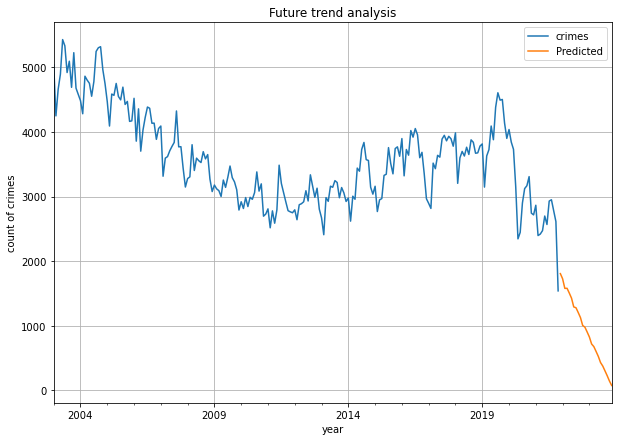

In [69]:
# plotting the future predictions
date_count['crimes'].plot(legend = True , label = 'crimes' ,figsize=(10,7))
pred.plot(legend = True , label = 'Predicted', figsize=(10,7))
plt.xlabel('year')
plt.ylabel('count of crimes')
plt.title('Future trend analysis')
plt.grid()